# Import the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.listdir(r'E:\NLP\UPDATED_NLP_COURSE\TextFiles')

['amazonreviews.tsv',
 'elon_tweets.txt',
 'elon_tweets2.txt',
 'huckfinn.txt',
 'moviereviews.tsv',
 'moviereviews2.tsv',
 'owlcreek.txt',
 'peterrabbit.txt',
 'reaganomics.txt',
 'reuters.csv',
 'smsspamcollection.tsv',
 'sms_readme.txt']

In [3]:
df=pd.read_csv(r'E:\NLP\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv',sep='\t')

In [4]:
df.shape

(5572, 4)

In [5]:
df.head(6)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Explarotary DataAnalysis:

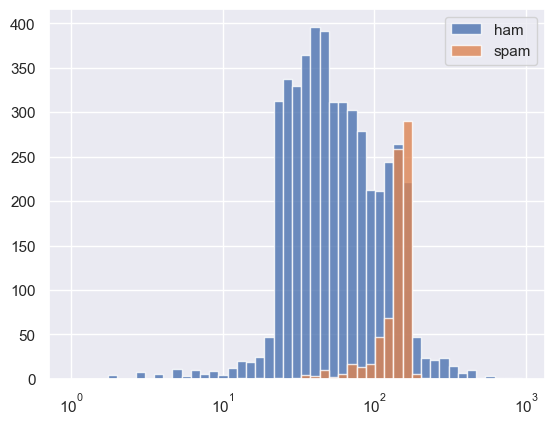

In [11]:
plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

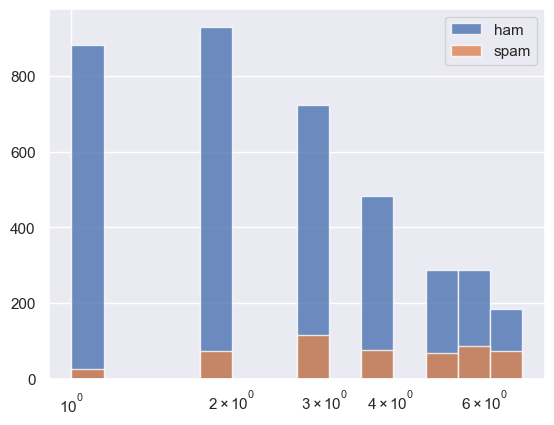

In [12]:
plt.xscale('log')
bins=1.15**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

# Spliting the DataSet:

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df[['length','punct']]
y=df['label']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [16]:
X_train.shape

(3900, 2)

In [17]:
X_test.shape

(1672, 2)

In [18]:
y_train.shape

(3900,)

In [19]:
y_test.shape

(1672,)

# Model:

# 1.Logistic Regression:

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_regression=LogisticRegression()

In [22]:
log_regression.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation:

In [23]:
from sklearn import metrics

In [24]:
predictions=log_regression.predict(X_test)

In [25]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
metrics.confusion_matrix(y_test,predictions)

array([[1422,   29],
       [ 217,    4]], dtype=int64)

In [27]:
c_m=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [28]:
c_m

,ham,spam
ham,1422,29
spam,217,4


In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1451
        spam       0.12      0.02      0.03       221

    accuracy                           0.85      1672
   macro avg       0.49      0.50      0.48      1672
weighted avg       0.77      0.85      0.80      1672



In [30]:
metrics.accuracy_score(y_test,predictions)

0.8528708133971292

# 2.SVM:

# MOdel:

In [31]:
from sklearn.svm import SVC

In [32]:
svc_model=SVC()

In [33]:
svc_model.fit(X_train,y_train)

SVC()

In [34]:
predictions=svc_model.predict(X_test)

# Model Evaluation:

In [35]:
from sklearn import metrics

In [36]:
c_m=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [37]:
c_m

,ham,spam
ham,1434,17
spam,182,39


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94      1451
        spam       0.70      0.18      0.28       221

    accuracy                           0.88      1672
   macro avg       0.79      0.58      0.61      1672
weighted avg       0.86      0.88      0.85      1672



In [39]:
metrics.accuracy_score(y_test,predictions)

0.8809808612440191

# Making new Predictions:

In [40]:
length=[1000,352,26,76,155]

In [41]:
punct=[19,2,0,9,6]

In [42]:
new=pd.DataFrame({'length':length,'punct':punct})

In [43]:
new

,length,punct
0,1000,19
1,352,2
2,26,0
3,76,9
4,155,6


In [44]:
result=log_regression.predict(new)

In [45]:
result

array(['spam', 'spam', 'ham', 'ham', 'ham'], dtype=object)